In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as scp
import math
import statistics
import seaborn as sns
import sklearn

from matplotlib.patches import Polygon
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy import stats
from statistics import stdev
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
from scipy.stats import pearsonr

#from sklearn import linear_model
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


import numpy as np
from sklearn.decomposition import PCA

In [2]:
datainput = pd.read_csv("sales_train_evaluation.csv")

In [3]:
calendar = pd.read_csv("calendar.csv")

In [4]:
prices = pd.read_csv("sell_prices.csv")

In [5]:
df = datainput.interpolate();

In [6]:
df_hobbies = df.loc[df['cat_id'] == 'HOBBIES']
df_foods = df.loc[df['cat_id'] == 'FOODS']
df_household = df.loc[df['cat_id'] == 'HOUSEHOLD']

hobbies_count = df_hobbies['item_id'].nunique()
foods_count = df_foods['item_id'].nunique()
household_count = df_household['item_id'].nunique()

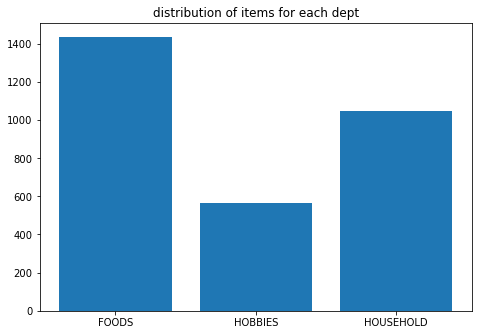

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dept = ['FOODS', 'HOBBIES', 'HOUSEHOLD']
count_dept = [foods_count,hobbies_count,household_count]
ax.bar(dept,count_dept)
plt.title('distribution of items for each dept')
plt.show()

In [8]:
conditions = [
    prices['item_id'].str.contains('HOBBIES', na=False),
    prices['item_id'].str.contains('FOODS', na=False),
    prices['item_id'].str.contains('HOUSEHOLD', na=False)]
choices = ['HOBBIES', 'FOODS', 'HOUSEHOLD']
prices['dept'] = np.select(conditions, choices, default='FOODS')


In [9]:
df_prices_foods = prices.loc[prices['dept'] == 'FOODS']
df_prices_hobbies = prices.loc[prices['dept'] == 'HOBBIES']
df_prices_household = prices.loc[prices['dept'] == 'HOUSEHOLD']

df_prices_foods['sell_price'].mean()
df_prices_hobbies['sell_price'].mean()
df_prices_household['sell_price'].mean()

5.465780240876861

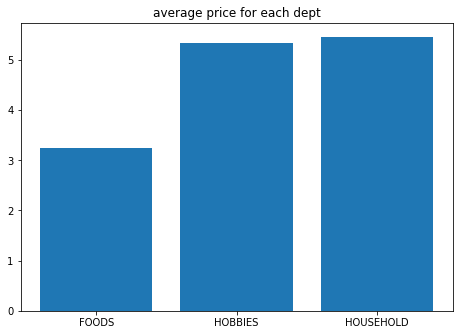

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dept = ['FOODS', 'HOBBIES', 'HOUSEHOLD']
list_prices = [df_prices_foods['sell_price'].mean(),df_prices_hobbies['sell_price'].mean(),df_prices_household['sell_price'].mean()]
ax.bar(dept,list_prices)
plt.title('average price for each dept')
plt.show()

In [11]:
sum_each_row_df = datainput.drop(["id", "item_id", "dept_id", "cat_id","store_id","state_id"], axis=1)
sum_each_row = sum_each_row_df.sum(axis = 1)
sum_each_row_df = sum_each_row.to_frame()
sum_each_row_df = sum_each_row_df.rename(columns={0: "total_sales"})
temp_df = datainput.assign(total_sales = sum_each_row_df["total_sales"])

In [12]:
temp_df.sort_values(by=['total_sales'], inplace=False)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,total_sales
6048,FOODS_3_778_CA_2_evaluation,FOODS_3_778,FOODS_3,FOODS,CA_2,CA,0,0,0,0,...,0,0,0,2,0,0,0,0,0,15
27606,HOBBIES_1_170_WI_3_evaluation,HOBBIES_1_170,HOBBIES_1,HOBBIES,WI_3,WI,0,0,0,0,...,0,0,0,1,1,0,0,0,0,16
26276,FOODS_2_057_WI_2_evaluation,FOODS_2_057,FOODS_2,FOODS,WI_2,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
20192,FOODS_2_071_TX_3_evaluation,FOODS_2_071,FOODS_2,FOODS,TX_3,TX,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
10458,HOUSEHOLD_2_216_CA_4_evaluation,HOUSEHOLD_2_216,HOUSEHOLD_2,HOUSEHOLD,CA_4,CA,0,0,0,0,...,0,1,0,0,0,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,FOODS_3_090_CA_1_evaluation,FOODS_3_090,FOODS_3,FOODS,CA_1,CA,107,182,47,47,...,47,74,38,42,39,51,69,67,64,128855
8908,FOODS_3_586_CA_3_evaluation,FOODS_3_586,FOODS_3,FOODS,CA_3,CA,56,55,45,57,...,82,72,63,74,73,66,59,68,89,136269
21104,FOODS_3_586_TX_3_evaluation,FOODS_3_586,FOODS_3,FOODS,TX_3,TX,115,116,71,66,...,70,88,48,51,29,39,92,83,94,151862
18055,FOODS_3_586_TX_2_evaluation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,98,85,47,56,...,83,103,73,86,76,53,96,79,117,195120


In [13]:
temp_df.loc[temp_df['total_sales'].idxmax()]

id             FOODS_3_090_CA_3_evaluation
item_id                        FOODS_3_090
dept_id                            FOODS_3
cat_id                               FOODS
store_id                              CA_3
                          ...             
d_1938                                  75
d_1939                                 110
d_1940                                 156
d_1941                                  99
total_sales                         253859
Name: 8412, Length: 1948, dtype: object

In [14]:
## FOODS_3_090_CA_3_evaluation

In [15]:
example_prices_CA_3 = prices.loc[prices['store_id'] == 'CA_3']
example_prices = example_prices_CA_3.loc[example_prices_CA_3['item_id'] == 'FOODS_3_090']



In [16]:
example_prices

,store_id,item_id,wm_yr_wk,sell_price,dept
1862424,CA_3,FOODS_3_090,11101,1.25,FOODS
1862425,CA_3,FOODS_3_090,11102,1.25,FOODS
1862426,CA_3,FOODS_3_090,11103,1.25,FOODS
1862427,CA_3,FOODS_3_090,11104,1.25,FOODS
1862428,CA_3,FOODS_3_090,11105,1.25,FOODS
...,...,...,...,...,...
1862701,CA_3,FOODS_3_090,11617,1.60,FOODS
1862702,CA_3,FOODS_3_090,11618,1.60,FOODS
1862703,CA_3,FOODS_3_090,11619,1.60,FOODS
1862704,CA_3,FOODS_3_090,11620,1.60,FOODS


In [17]:
##example_prices.loc[example_prices['wm_yr_wk'] == 11135]

In [18]:
temp_date = calendar.drop(["year", "event_name_1", "event_name_2", "event_type_1","event_type_2", "snap_CA", "snap_TX", "snap_WI"], axis=1)

In [19]:
inner_merged = pd.merge(example_prices, temp_date)

In [20]:
inner_merged = inner_merged.head(1941)
#inner_merged

In [21]:
example_sales_CA_3 = datainput.loc[datainput['store_id'] == 'CA_3']
example_sales_CA_3 = example_sales_CA_3.loc[example_sales_CA_3['item_id'] == 'FOODS_3_090']

In [22]:
example_sales_CA_3 = example_sales_CA_3.drop(["id", "item_id", "dept_id", "cat_id","store_id","state_id"], axis=1)

In [23]:
example_sales_CA_3 = example_sales_CA_3.T
example_sales_CA_3 = example_sales_CA_3.rename(columns={8412: "sales"})
example_sales_CA_3["d"] = example_sales_CA_3.index 

In [24]:
example_sales_CA_3

,sales,d
d_1,108,d_1
d_2,132,d_2
d_3,102,d_3
d_4,120,d_4
d_5,106,d_5
...,...,...
d_1937,69,d_1937
d_1938,75,d_1938
d_1939,110,d_1939
d_1940,156,d_1940


In [25]:
inner_merged_2 = pd.merge(inner_merged, example_sales_CA_3)

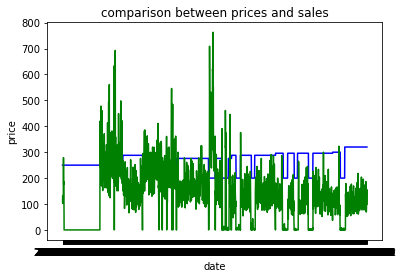

In [26]:

plt.xlabel('date')
plt.ylabel('price')
plt.plot(inner_merged_2["date"].values, inner_merged_2["sell_price"].values*200, label = "CA", color = 'b')
plt.plot(inner_merged_2["date"].values, inner_merged_2["sales"].values, label = "TX", color = 'g')
plt.title('comparison between prices and sales')
plt.show()

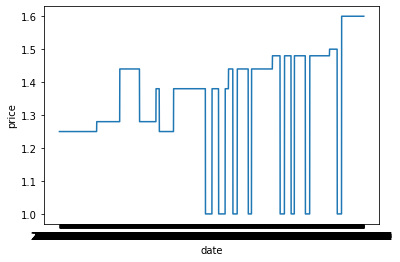

In [27]:
plt.plot(inner_merged["date"], inner_merged["sell_price"])
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [28]:
df_CA = df.loc[df['state_id'] == 'CA']
df_TX = df.loc[df['state_id'] == 'TX']
df_WI = df.loc[df['state_id'] == 'WI']

In [29]:
df_CA_temp_1 = df_CA.drop(["id", "item_id", "dept_id", "cat_id","store_id","state_id"], axis=1)
df_TX_temp_1 = df_TX.drop(["id", "item_id", "dept_id", "cat_id","store_id","state_id"], axis=1)
df_WI_temp_1 = df_WI.drop(["id", "item_id", "dept_id", "cat_id","store_id","state_id"], axis=1)

In [30]:
dailySales_CA = df_CA_temp_1.sum(axis = 0)
dailySales_TX = df_TX_temp_1.sum(axis = 0)
dailySales_WI = df_WI_temp_1.sum(axis = 0)

df_dailySales_CA = dailySales_CA.to_frame()
df_dailySales_CA = df_dailySales_CA.rename(columns={0: "sales"})
df_dailySales_TX = dailySales_TX.to_frame()
df_dailySales_TX = df_dailySales_TX.rename(columns={0: "sales"})
df_dailySales_WI = dailySales_WI.to_frame()
df_dailySales_WI = df_dailySales_WI.rename(columns={0: "sales"})

In [31]:
calendar_temp_1 = calendar[['d','date','year']].copy()
calendar_temp_1 = calendar_temp_1.head(df_dailySales_CA.shape[0])

In [32]:
calendar_temp_1

,d,date,year
0,d_1,2011-01-29,2011
1,d_2,2011-01-30,2011
2,d_3,2011-01-31,2011
3,d_4,2011-02-01,2011
4,d_5,2011-02-02,2011
...,...,...,...
1936,d_1937,2016-05-18,2016
1937,d_1938,2016-05-19,2016
1938,d_1939,2016-05-20,2016
1939,d_1940,2016-05-21,2016


In [33]:
plt.rcParams["figure.figsize"] = (25,5.5)

In [34]:
df_dailySales_CA = calendar_temp_1.assign(sales = df_dailySales_CA["sales"].values)
df_dailySales_TX = calendar_temp_1.assign(sales = df_dailySales_TX["sales"].values)
df_dailySales_WI = calendar_temp_1.assign(sales = df_dailySales_WI["sales"].values)

In [35]:
df_CA_temp_2 = df_CA.drop(["id", "item_id", "dept_id", "cat_id","store_id"], axis=1)
df_TX_temp_2 = df_TX.drop(["id", "item_id", "dept_id", "cat_id","store_id"], axis=1)
df_WI_temp_2 = df_WI.drop(["id", "item_id", "dept_id", "cat_id","store_id"], axis=1)

In [36]:
SumSales_CA = df_CA_temp_2.sum(axis = 0)
SumSales_TX = df_TX_temp_2.sum(axis = 0)
SumSales_WI = df_WI_temp_2.sum(axis = 0)

SumSales_CA_df = SumSales_CA.to_frame()
SumSales_TX_df = SumSales_TX.to_frame()
SumSales_WI_df = SumSales_WI.to_frame()

In [37]:
SumSales_CA_df = SumSales_CA_df.T
SumSales_TX_df = SumSales_TX_df.T
SumSales_WI_df = SumSales_WI_df.T

In [38]:
SumSales_CA_df = SumSales_CA_df.drop(["state_id"], axis=1)
SumSales_TX_df = SumSales_TX_df.drop(["state_id"], axis=1)
SumSales_WI_df = SumSales_WI_df.drop(["state_id"], axis=1)

In [39]:
Sum_CA = SumSales_CA_df.sum(axis=1)[0]
Sum_TX = SumSales_TX_df.sum(axis=1)[0]
Sum_WI = SumSales_WI_df.sum(axis=1)[0]

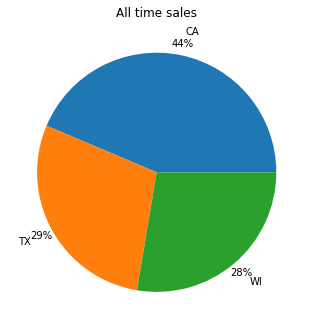

In [40]:
y = np.array([Sum_CA, Sum_TX, Sum_WI])
alabels = ["CA", "TX", "WI"]
plt.pie(y, labels = alabels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('All time sales')
plt.show() 

In [41]:
day_data = datainput.drop(["id", "item_id", "cat_id","store_id","state_id","dept_id"], axis=1)
sum_sale_day = day_data.sum(axis = 0)
sum_sale_day_df = sum_sale_day.to_frame()
sum_sale_day_df = sum_sale_day_df.rename(columns={0: "sales"})
sum_sale_day_df["d"] = sum_sale_day_df.index
sum_sale_day_df
inner_merged_3 = pd.merge(sum_sale_day_df, temp_date)

total_sale_sunday_df = inner_merged_3.loc[inner_merged_3['weekday'] == 'Sunday']
total_sale_sunday = total_sale_sunday_df['sales'].sum()
total_sale_monday_df = inner_merged_3.loc[inner_merged_3['weekday'] == 'Monday']
total_sale_monday = total_sale_monday_df['sales'].sum()
total_sale_tuesday_df = inner_merged_3.loc[inner_merged_3['weekday'] == 'Tuesday']
total_sale_tuesday = total_sale_tuesday_df['sales'].sum()
total_sale_wednesday_df = inner_merged_3.loc[inner_merged_3['weekday'] == 'Wednesday']
total_sale_wednesday = total_sale_wednesday_df['sales'].sum()
total_sale_thrusday_df = inner_merged_3.loc[inner_merged_3['weekday'] == 'Thursday']
total_sale_thrusday = total_sale_thrusday_df['sales'].sum()
total_sale_friday_df = inner_merged_3.loc[inner_merged_3['weekday'] == 'Friday']
total_sale_friday = total_sale_friday_df['sales'].sum()
total_sale_saturday_df = inner_merged_3.loc[inner_merged_3['weekday'] == 'Saturday']
total_sale_saturday = total_sale_saturday_df['sales'].sum()

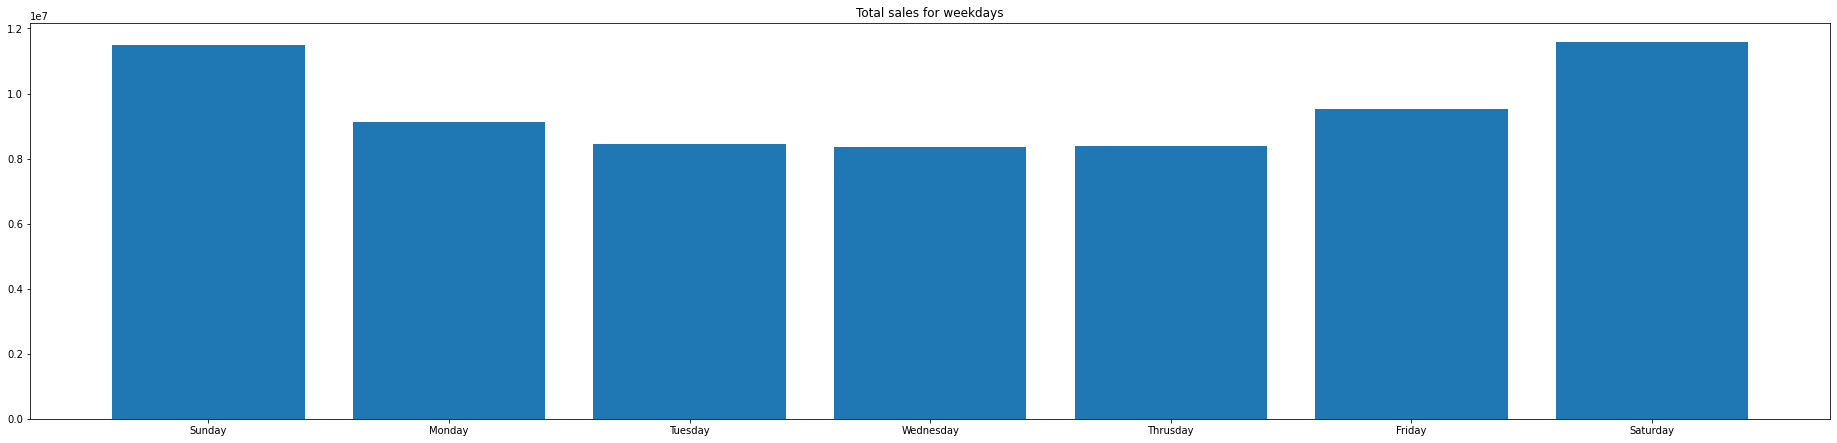

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday']
sum_sale_day = [total_sale_sunday,total_sale_monday,total_sale_tuesday,total_sale_wednesday,total_sale_thrusday,total_sale_friday,total_sale_saturday]
ax.bar(day,sum_sale_day)
plt.title('Total sales for weekdays')
plt.show()

In [43]:
df_CA_temp_3 = df_CA.drop(["id", "item_id", "cat_id","store_id","state_id"], axis=1)
df_TX_temp_3 = df_TX.drop(["id", "item_id", "cat_id","store_id","state_id"], axis=1)
df_WI_temp_3 = df_WI.drop(["id", "item_id", "cat_id","store_id","state_id"], axis=1)

In [44]:
df_CA_HOBBIES_1 = df_CA_temp_3[df_CA_temp_3.dept_id == 'HOBBIES_1']
df_CA_HOBBIES_2 = df_CA_temp_3[df_CA_temp_3.dept_id == 'HOBBIES_2']
df_CA_FOODS_1 = df_CA_temp_3[df_CA_temp_3.dept_id == 'FOODS_1']
df_CA_FOODS_2 = df_CA_temp_3[df_CA_temp_3.dept_id == 'FOODS_2']
df_CA_FOODS_3 = df_CA_temp_3[df_CA_temp_3.dept_id == 'FOODS_3']
df_CA_HOUSEHOLD_1 = df_CA_temp_3[df_CA_temp_3.dept_id == 'HOUSEHOLD_1']
df_CA_HOUSEHOLD_2 = df_CA_temp_3[df_CA_temp_3.dept_id == 'HOUSEHOLD_2']

df_TX_HOBBIES_1 = df_TX_temp_3[df_TX_temp_3.dept_id == 'HOBBIES_1']
df_TX_HOBBIES_2 = df_TX_temp_3[df_TX_temp_3.dept_id == 'HOBBIES_2']
df_TX_FOODS_1 = df_TX_temp_3[df_TX_temp_3.dept_id == 'FOODS_1']
df_TX_FOODS_2 = df_TX_temp_3[df_TX_temp_3.dept_id == 'FOODS_2']
df_TX_FOODS_3 = df_TX_temp_3[df_TX_temp_3.dept_id == 'FOODS_3']
df_TX_HOUSEHOLD_1 = df_TX_temp_3[df_TX_temp_3.dept_id == 'HOUSEHOLD_1']
df_TX_HOUSEHOLD_2 = df_TX_temp_3[df_TX_temp_3.dept_id == 'HOUSEHOLD_2']

df_WI_HOBBIES_1 = df_WI_temp_3[df_WI_temp_3.dept_id == 'HOBBIES_1']
df_WI_HOBBIES_2 = df_WI_temp_3[df_WI_temp_3.dept_id == 'HOBBIES_2']
df_WI_FOODS_1 = df_WI_temp_3[df_WI_temp_3.dept_id == 'FOODS_1']
df_WI_FOODS_2 = df_WI_temp_3[df_WI_temp_3.dept_id == 'FOODS_2']
df_WI_FOODS_3 = df_WI_temp_3[df_WI_temp_3.dept_id == 'FOODS_3']
df_WI_HOUSEHOLD_1 = df_WI_temp_3[df_WI_temp_3.dept_id == 'HOUSEHOLD_1']
df_WI_HOUSEHOLD_2 = df_WI_temp_3[df_WI_temp_3.dept_id == 'HOUSEHOLD_2']

In [45]:
SumSales_CA_HOBBIES_1 = df_CA_HOBBIES_1.sum(axis = 0)
SumSales_CA_HOBBIES_1_df = SumSales_CA_HOBBIES_1.to_frame()
SumSales_CA_HOBBIES_1_df = SumSales_CA_HOBBIES_1_df.T
SumSales_CA_HOBBIES_1_df = SumSales_CA_HOBBIES_1_df.drop(["dept_id"], axis=1)
Sum_CA_HOBBIES_1 = SumSales_CA_HOBBIES_1_df.sum(axis=1)[0]

SumSales_CA_HOBBIES_2 = df_CA_HOBBIES_2.sum(axis = 0)
SumSales_CA_HOBBIES_2_df = SumSales_CA_HOBBIES_2.to_frame()
SumSales_CA_HOBBIES_2_df = SumSales_CA_HOBBIES_2_df.T
SumSales_CA_HOBBIES_2_df = SumSales_CA_HOBBIES_2_df.drop(["dept_id"], axis=1)
Sum_CA_HOBBIES_2 = SumSales_CA_HOBBIES_2_df.sum(axis=1)[0]

SumSales_CA_FOODS_1 = df_CA_FOODS_1.sum(axis = 0)
SumSales_CA_FOODS_1_df = SumSales_CA_FOODS_1.to_frame()
SumSales_CA_FOODS_1_df = SumSales_CA_FOODS_1_df.T
SumSales_CA_FOODS_1_df = SumSales_CA_FOODS_1_df.drop(["dept_id"], axis=1)
Sum_CA_FOODS_1 = SumSales_CA_FOODS_1_df.sum(axis=1)[0]

SumSales_CA_FOODS_2 = df_CA_FOODS_2.sum(axis = 0)
SumSales_CA_FOODS_2_df = SumSales_CA_FOODS_2.to_frame()
SumSales_CA_FOODS_2_df = SumSales_CA_FOODS_2_df.T
SumSales_CA_FOODS_2_df = SumSales_CA_FOODS_2_df.drop(["dept_id"], axis=1)
Sum_CA_FOODS_2 = SumSales_CA_FOODS_2_df.sum(axis=1)[0]

SumSales_CA_FOODS_3 = df_CA_FOODS_3.sum(axis = 0)
SumSales_CA_FOODS_3_df = SumSales_CA_FOODS_3.to_frame()
SumSales_CA_FOODS_3_df = SumSales_CA_FOODS_3_df.T
SumSales_CA_FOODS_3_df = SumSales_CA_FOODS_3_df.drop(["dept_id"], axis=1)
Sum_CA_FOODS_3 = SumSales_CA_FOODS_3_df.sum(axis=1)[0]

SumSales_CA_HOUSEHOLD_1 = df_CA_HOUSEHOLD_1.sum(axis = 0)
SumSales_CA_HOUSEHOLD_1_df = SumSales_CA_HOUSEHOLD_1.to_frame()
SumSales_CA_HOUSEHOLD_1_df = SumSales_CA_HOUSEHOLD_1_df.T
SumSales_CA_HOUSEHOLD_1_df = SumSales_CA_HOUSEHOLD_1_df.drop(["dept_id"], axis=1)
Sum_CA_HOUSEHOLD_1 = SumSales_CA_HOUSEHOLD_1_df.sum(axis=1)[0]

SumSales_CA_HOUSEHOLD_2 = df_CA_HOUSEHOLD_2.sum(axis = 0)
SumSales_CA_HOUSEHOLD_2_df = SumSales_CA_HOUSEHOLD_2.to_frame()
SumSales_CA_HOUSEHOLD_2_df = SumSales_CA_HOUSEHOLD_2_df.T
SumSales_CA_HOUSEHOLD_2_df = SumSales_CA_HOUSEHOLD_2_df.drop(["dept_id"], axis=1)
Sum_CA_HOUSEHOLD_2 = SumSales_CA_HOUSEHOLD_2_df.sum(axis=1)[0]

In [46]:
SumSales_TX_HOBBIES_1 = df_TX_HOBBIES_1.sum(axis = 0)
SumSales_TX_HOBBIES_1_df = SumSales_TX_HOBBIES_1.to_frame()
SumSales_TX_HOBBIES_1_df = SumSales_TX_HOBBIES_1_df.T
SumSales_TX_HOBBIES_1_df = SumSales_TX_HOBBIES_1_df.drop(["dept_id"], axis=1)
Sum_TX_HOBBIES_1 = SumSales_TX_HOBBIES_1_df.sum(axis=1)[0]

SumSales_TX_HOBBIES_2 = df_TX_HOBBIES_2.sum(axis = 0)
SumSales_TX_HOBBIES_2_df = SumSales_TX_HOBBIES_2.to_frame()
SumSales_TX_HOBBIES_2_df = SumSales_TX_HOBBIES_2_df.T
SumSales_TX_HOBBIES_2_df = SumSales_TX_HOBBIES_2_df.drop(["dept_id"], axis=1)
Sum_TX_HOBBIES_2 = SumSales_TX_HOBBIES_2_df.sum(axis=1)[0]

SumSales_TX_FOODS_1 = df_TX_FOODS_1.sum(axis = 0)
SumSales_TX_FOODS_1_df = SumSales_TX_FOODS_1.to_frame()
SumSales_TX_FOODS_1_df = SumSales_TX_FOODS_1_df.T
SumSales_TX_FOODS_1_df = SumSales_TX_FOODS_1_df.drop(["dept_id"], axis=1)
Sum_TX_FOODS_1 = SumSales_TX_FOODS_1_df.sum(axis=1)[0]

SumSales_TX_FOODS_2 = df_TX_FOODS_2.sum(axis = 0)
SumSales_TX_FOODS_2_df = SumSales_TX_FOODS_2.to_frame()
SumSales_TX_FOODS_2_df = SumSales_TX_FOODS_2_df.T
SumSales_TX_FOODS_2_df = SumSales_TX_FOODS_2_df.drop(["dept_id"], axis=1)
Sum_TX_FOODS_2 = SumSales_TX_FOODS_2_df.sum(axis=1)[0]

SumSales_TX_FOODS_3 = df_TX_FOODS_3.sum(axis = 0)
SumSales_TX_FOODS_3_df = SumSales_TX_FOODS_3.to_frame()
SumSales_TX_FOODS_3_df = SumSales_TX_FOODS_3_df.T
SumSales_TX_FOODS_3_df = SumSales_TX_FOODS_3_df.drop(["dept_id"], axis=1)
Sum_TX_FOODS_3 = SumSales_TX_FOODS_3_df.sum(axis=1)[0]

SumSales_TX_HOUSEHOLD_1 = df_TX_HOUSEHOLD_1.sum(axis = 0)
SumSales_TX_HOUSEHOLD_1_df = SumSales_TX_HOUSEHOLD_1.to_frame()
SumSales_TX_HOUSEHOLD_1_df = SumSales_TX_HOUSEHOLD_1_df.T
SumSales_TX_HOUSEHOLD_1_df = SumSales_TX_HOUSEHOLD_1_df.drop(["dept_id"], axis=1)
Sum_TX_HOUSEHOLD_1 = SumSales_TX_HOUSEHOLD_1_df.sum(axis=1)[0]

SumSales_TX_HOUSEHOLD_2 = df_TX_HOUSEHOLD_2.sum(axis = 0)
SumSales_TX_HOUSEHOLD_2_df = SumSales_TX_HOUSEHOLD_2.to_frame()
SumSales_TX_HOUSEHOLD_2_df = SumSales_TX_HOUSEHOLD_2_df.T
SumSales_TX_HOUSEHOLD_2_df = SumSales_TX_HOUSEHOLD_2_df.drop(["dept_id"], axis=1)
Sum_TX_HOUSEHOLD_2 = SumSales_TX_HOUSEHOLD_2_df.sum(axis=1)[0]

In [47]:
SumSales_WI_HOBBIES_1 = df_WI_HOBBIES_1.sum(axis = 0)
SumSales_WI_HOBBIES_1_df = SumSales_WI_HOBBIES_1.to_frame()
SumSales_WI_HOBBIES_1_df = SumSales_WI_HOBBIES_1_df.T
SumSales_WI_HOBBIES_1_df = SumSales_WI_HOBBIES_1_df.drop(["dept_id"], axis=1)
Sum_WI_HOBBIES_1 = SumSales_WI_HOBBIES_1_df.sum(axis=1)[0]

SumSales_WI_HOBBIES_2 = df_WI_HOBBIES_2.sum(axis = 0)
SumSales_WI_HOBBIES_2_df = SumSales_WI_HOBBIES_2.to_frame()
SumSales_WI_HOBBIES_2_df = SumSales_WI_HOBBIES_2_df.T
SumSales_WI_HOBBIES_2_df = SumSales_WI_HOBBIES_2_df.drop(["dept_id"], axis=1)
Sum_WI_HOBBIES_2 = SumSales_WI_HOBBIES_2_df.sum(axis=1)[0]

SumSales_WI_FOODS_1 = df_WI_FOODS_1.sum(axis = 0)
SumSales_WI_FOODS_1_df = SumSales_WI_FOODS_1.to_frame()
SumSales_WI_FOODS_1_df = SumSales_WI_FOODS_1_df.T
SumSales_WI_FOODS_1_df = SumSales_WI_FOODS_1_df.drop(["dept_id"], axis=1)
Sum_WI_FOODS_1 = SumSales_WI_FOODS_1_df.sum(axis=1)[0]

SumSales_WI_FOODS_2 = df_WI_FOODS_2.sum(axis = 0)
SumSales_WI_FOODS_2_df = SumSales_WI_FOODS_2.to_frame()
SumSales_WI_FOODS_2_df = SumSales_WI_FOODS_2_df.T
SumSales_WI_FOODS_2_df = SumSales_WI_FOODS_2_df.drop(["dept_id"], axis=1)
Sum_WI_FOODS_2 = SumSales_WI_FOODS_2_df.sum(axis=1)[0]

SumSales_WI_FOODS_3 = df_WI_FOODS_3.sum(axis = 0)
SumSales_WI_FOODS_3_df = SumSales_WI_FOODS_3.to_frame()
SumSales_WI_FOODS_3_df = SumSales_WI_FOODS_3_df.T
SumSales_WI_FOODS_3_df = SumSales_WI_FOODS_3_df.drop(["dept_id"], axis=1)
Sum_WI_FOODS_3 = SumSales_WI_FOODS_3_df.sum(axis=1)[0]

SumSales_WI_HOUSEHOLD_1 = df_WI_HOUSEHOLD_1.sum(axis = 0)
SumSales_WI_HOUSEHOLD_1_df = SumSales_WI_HOUSEHOLD_1.to_frame()
SumSales_WI_HOUSEHOLD_1_df = SumSales_WI_HOUSEHOLD_1_df.T
SumSales_WI_HOUSEHOLD_1_df = SumSales_WI_HOUSEHOLD_1_df.drop(["dept_id"], axis=1)
Sum_WI_HOUSEHOLD_1 = SumSales_WI_HOUSEHOLD_1_df.sum(axis=1)[0]

SumSales_WI_HOUSEHOLD_2 = df_WI_HOUSEHOLD_2.sum(axis = 0)
SumSales_WI_HOUSEHOLD_2_df = SumSales_WI_HOUSEHOLD_2.to_frame()
SumSales_WI_HOUSEHOLD_2_df = SumSales_WI_HOUSEHOLD_2_df.T
SumSales_WI_HOUSEHOLD_2_df = SumSales_WI_HOUSEHOLD_2_df.drop(["dept_id"], axis=1)
Sum_WI_HOUSEHOLD_2 = SumSales_WI_HOUSEHOLD_2_df.sum(axis=1)[0]

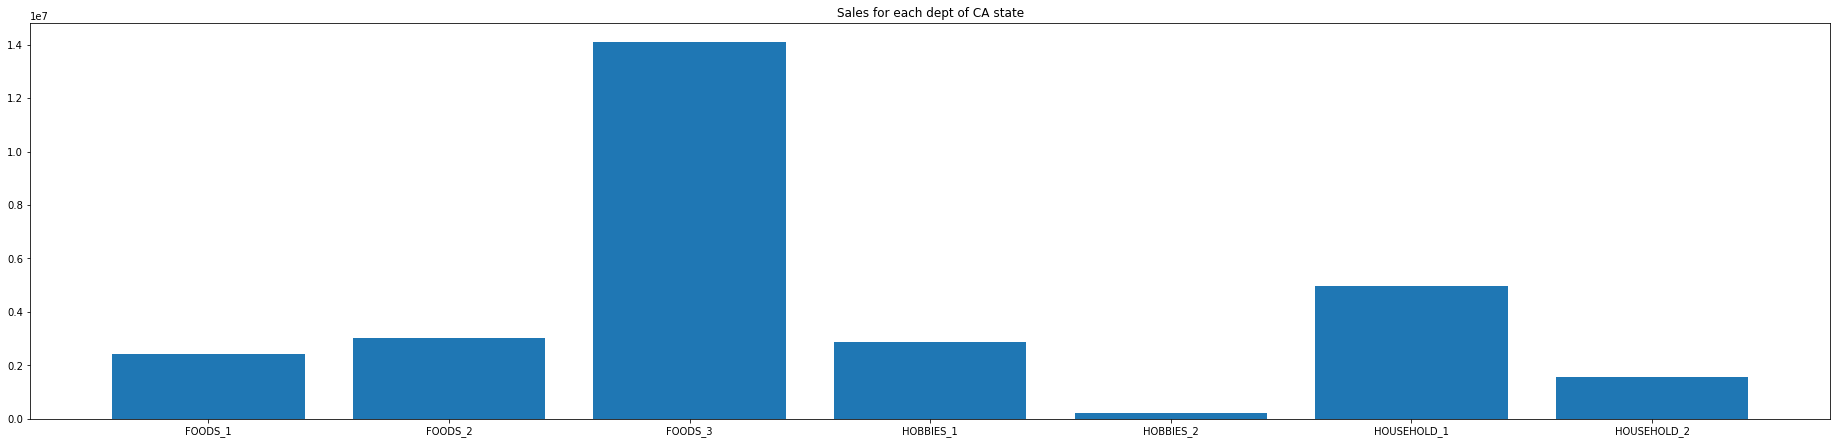

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dept = ['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2']
sum_CA = [Sum_CA_FOODS_1,Sum_CA_FOODS_2,Sum_CA_FOODS_3,Sum_CA_HOBBIES_1,Sum_CA_HOBBIES_2,Sum_CA_HOUSEHOLD_1,Sum_CA_HOUSEHOLD_2]
ax.bar(dept,sum_CA)
plt.title('Sales for each dept of CA state')
plt.show()

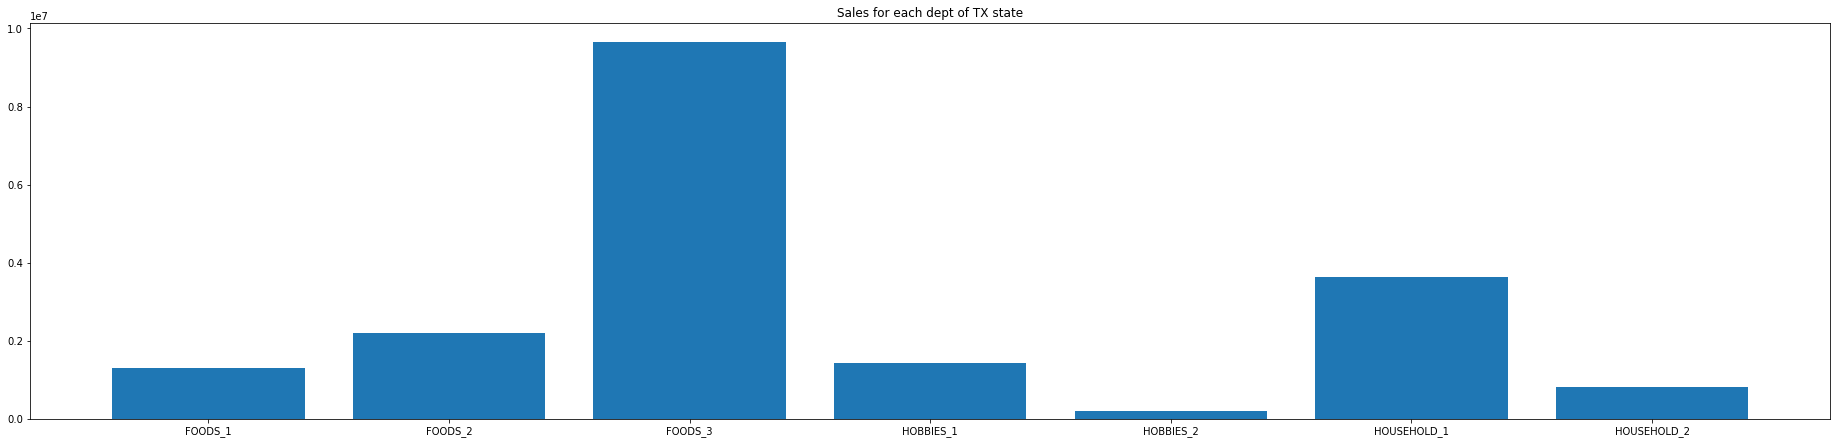

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sum_TX = [Sum_TX_FOODS_1,Sum_TX_FOODS_2,Sum_TX_FOODS_3,Sum_TX_HOBBIES_1,Sum_TX_HOBBIES_2,Sum_TX_HOUSEHOLD_1,Sum_TX_HOUSEHOLD_2]
ax.bar(dept,sum_TX)
plt.title('Sales for each dept of TX state')
plt.show()

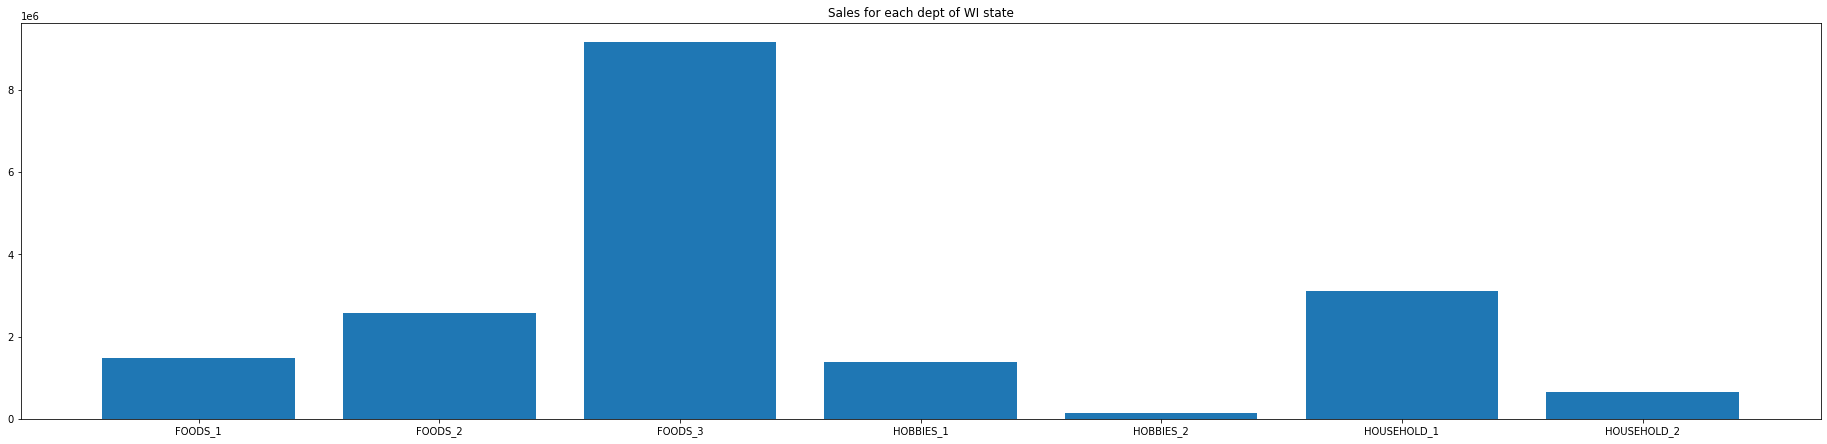

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sum_WI = [Sum_WI_FOODS_1,Sum_WI_FOODS_2,Sum_WI_FOODS_3,Sum_WI_HOBBIES_1,Sum_WI_HOBBIES_2,Sum_WI_HOUSEHOLD_1,Sum_WI_HOUSEHOLD_2]
ax.bar(dept,sum_WI)
plt.title('Sales for each dept of WI state')
plt.show()

In [51]:

df_dailySales_CA = dailySales_CA.to_frame()
df_dailySales_CA = df_dailySales_CA.rename(columns={0: "sales"})
df_dailySales_TX = dailySales_TX.to_frame()
df_dailySales_TX = df_dailySales_TX.rename(columns={0: "sales"})
df_dailySales_WI = dailySales_WI.to_frame()
df_dailySales_WI = df_dailySales_WI.rename(columns={0: "sales"})

df_dailySales_CA = calendar_temp_1.assign(sales = df_dailySales_CA["sales"].values)
df_dailySales_TX = calendar_temp_1.assign(sales = df_dailySales_TX["sales"].values)
df_dailySales_WI = calendar_temp_1.assign(sales = df_dailySales_WI["sales"].values)

In [52]:
df_dailySales_CA

,d,date,year,sales
0,d_1,2011-01-29,2011,14195
1,d_2,2011-01-30,2011,13805
2,d_3,2011-01-31,2011,10108
3,d_4,2011-02-01,2011,11047
4,d_5,2011-02-02,2011,9925
...,...,...,...,...
1936,d_1937,2016-05-18,2016,15678
1937,d_1938,2016-05-19,2016,16297
1938,d_1939,2016-05-20,2016,17430
1939,d_1940,2016-05-21,2016,23103


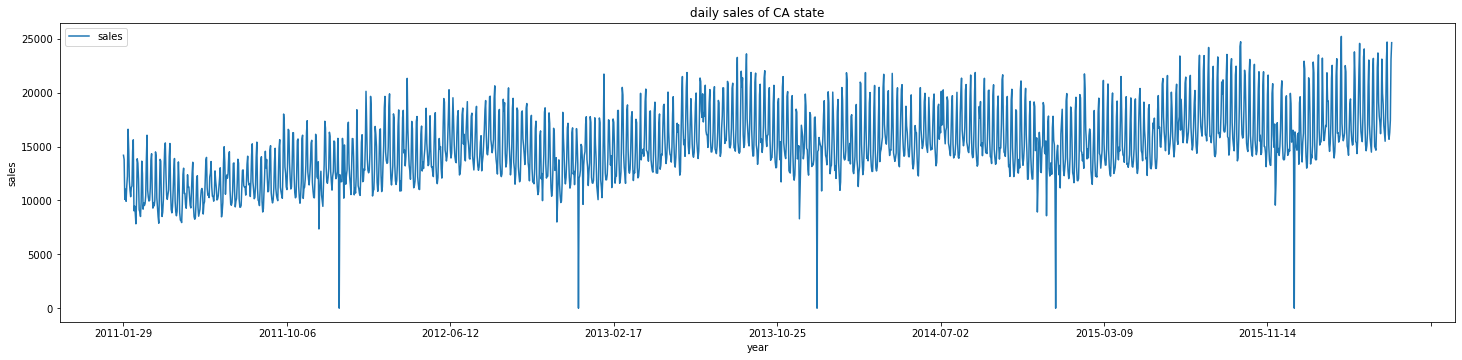

In [53]:
df_dailySales_CA.plot(x ='date', y='sales', kind = 'line')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('daily sales of CA state')
plt.show()

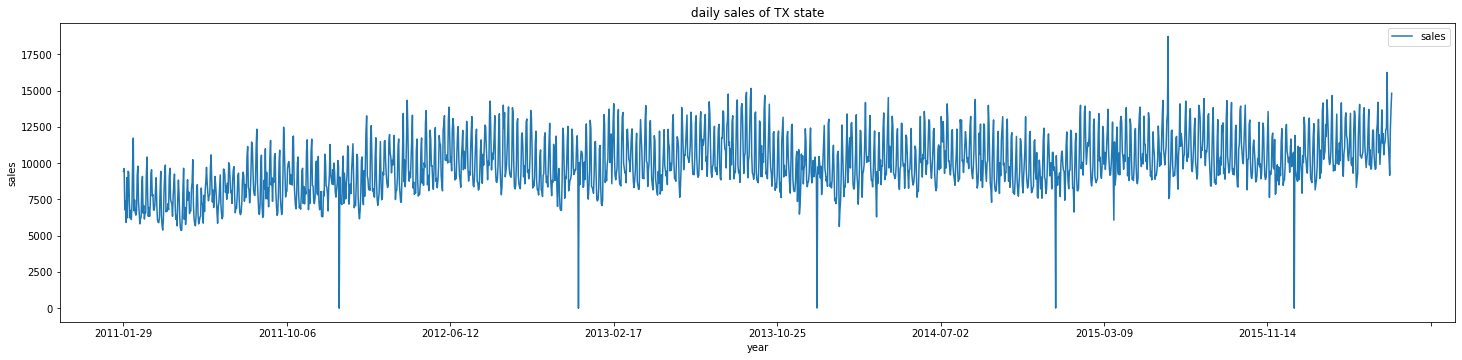

In [54]:
df_dailySales_TX.plot(x ='date', y='sales', kind = 'line')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('daily sales of TX state')
plt.show()


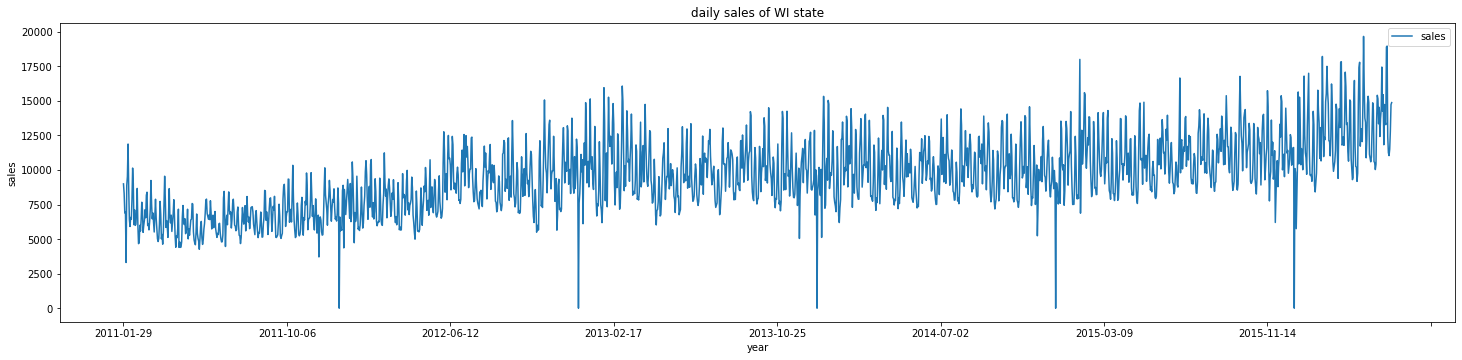

In [55]:
df_dailySales_WI.plot(x ='date', y='sales', kind = 'line')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('daily sales of WI state')
plt.show()

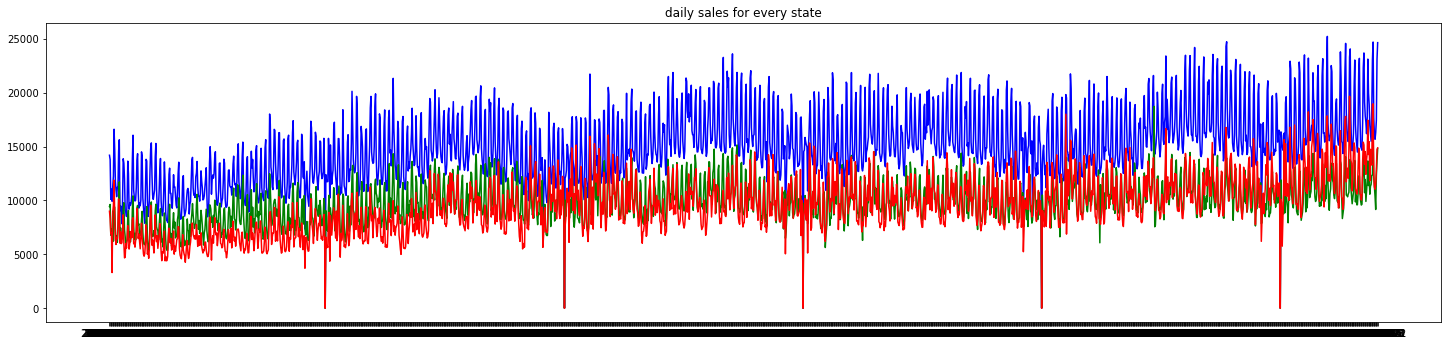

In [56]:
plt.plot(df_dailySales_CA['date'].values, df_dailySales_CA['sales'].values, label = "CA", color = 'b')
plt.plot(df_dailySales_TX['date'].values, df_dailySales_TX['sales'].values, label = "TX", color = 'g')
plt.plot(df_dailySales_WI['date'].values, df_dailySales_WI['sales'].values, label = "WI", color = 'r')
plt.title('daily sales for every state')
plt.show()

In [57]:
datainput

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [58]:
temp = pd.melt(datainput,id_vars=['id','item_id','dept_id','cat_id', 'store_id','state_id'],var_name='d', value_name='sales')

In [59]:
final_df = temp.drop(["id"], axis=1)

In [60]:
temp_date_2 = calendar.drop(["date","event_name_1", "event_name_2", "event_type_1","event_type_2", "snap_CA", "snap_TX", "snap_WI"], axis=1)
temp_date_2

,wm_yr_wk,weekday,wday,month,year,d
0,11101,Saturday,1,1,2011,d_1
1,11101,Sunday,2,1,2011,d_2
2,11101,Monday,3,1,2011,d_3
3,11101,Tuesday,4,2,2011,d_4
4,11101,Wednesday,5,2,2011,d_5
...,...,...,...,...,...,...
1964,11620,Wednesday,5,6,2016,d_1965
1965,11620,Thursday,6,6,2016,d_1966
1966,11620,Friday,7,6,2016,d_1967
1967,11621,Saturday,1,6,2016,d_1968


In [61]:
conditions = [
    (temp_date_2['wday'] == 1),
    (temp_date_2['wday'] == 2),
    (temp_date_2['wday'] > 2),
]

values = [1,1,0]

temp_date_2['weekend'] = np.select(conditions, values)
temp_date_2 = temp_date_2.drop(["wm_yr_wk","weekday"], axis=1)

In [62]:
final_df = pd.merge(final_df, temp_date_2)
final_df

,item_id,dept_id,cat_id,store_id,state_id,d,sales,wday,month,year,weekend
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,1,2011,1
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,1,2011,1
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,1,2011,1
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,1,2011,1
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...
59181085,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,1,2,5,2016,1
59181086,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,0,2,5,2016,1
59181087,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,2,2,5,2016,1
59181088,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,0,2,5,2016,1


In [63]:
#for i in final_df.columns:
#    if str(final_df[i].dtype)=='category':
#        final_df[i] = final_df[i].cat.codes

In [64]:
final_df.to_csv('final_data_file.csv')